In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/content/online_retail_data.csv")

In [51]:
#Total Revenue
df['revenue'] = df['quantity'] * df['price']

total_revenue = df['revenue'].sum()

print("Total Revenue:", total_revenue)

Total Revenue: 737326.8800000001


In [52]:
#Total Revenue by Category
revenue_by_category = df.groupby('category_name')['revenue'].sum().sort_values(ascending=False)

print("Total Revenue by Category:", revenue_by_category)

Total Revenue by Category: category_name
Electronics           166510.34
Sports & Outdoors     154346.26
Books & Stationery    143215.52
Home & Living         138540.15
Fashion               134714.61
Name: revenue, dtype: float64


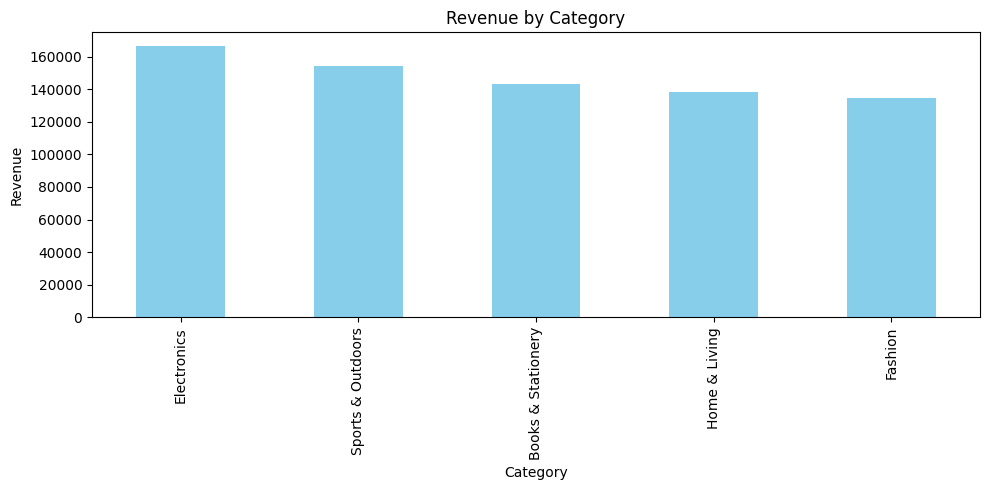

In [53]:
revenue_by_category.plot(kind='bar', figsize=(10,5), title='Revenue by Category', color='skyblue')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

As can be seen the Eletronics category is the best in the store and the Fashion is the least perfoming out all of the categories

In [54]:
#Top Citiies by Revenue
top_cities = df.groupby('city')['revenue'].sum().sort_values(ascending=False).head(10)

print("Top 10 Cities by Revenue:", top_cities)

Top 10 Cities by Revenue: city
Port Melissaborough    3941.29
Patriciaville          3324.10
Johnsonborough         3045.09
East William           3011.36
East Christopher       2919.20
East David             2888.53
Port Matthew           2708.05
Lewisfort              2700.90
Brownbury              2603.16
South Elizabeth        2581.12
Name: revenue, dtype: float64


In [55]:
#Payment Method Analysis
payment_method = df['payment_method'].value_counts()

print("Payment Method:", payment_method)

Payment Method: payment_method
Cash on Delivery    374
Bank Transfer       322
Credit Card         304
Name: count, dtype: int64


In [56]:
#Average Score by Category
avg_reviews = df.groupby('category_name')['review_score'].mean().sort_values(ascending=False)

print("Average Score by Category:", avg_reviews)

Average Score by Category: category_name
Sports & Outdoors     4.090909
Electronics           3.988166
Books & Stationery    3.973333
Fashion               3.968553
Home & Living         3.935897
Name: review_score, dtype: float64


In [57]:
#Revenue By Gender
revenue_by_gender = df.groupby('gender')['revenue'].sum()

print("Revenue By Gender:", revenue_by_gender)

Revenue By Gender: gender
F    331753.65
M    333894.19
Name: revenue, dtype: float64


In [58]:
#Revenue By Age Group
bin_counts = df['age'].value_counts(bins=6).sort_index()
og_bins = [interval.left for interval in bin_counts.index] + [bin_counts.index[-1].right]
rd_bins = np.ceil(og_bins).astype(int)
df['age_group'] = pd.cut(df['age'], bins=rd_bins)
bins_counts = df['age_group'].value_counts().sort_index()

revenue_by_age_group = df.groupby('age_group')['revenue'].sum()

print("Revenue By Age Group:", revenue_by_age_group)

Revenue By Age Group: age_group
(18, 28]    122732.10
(28, 37]    108522.21
(37, 47]    124850.56
(47, 56]    128847.86
(56, 66]    136743.65
(66, 75]    103388.60
Name: revenue, dtype: float64


<ipython-input-58-8fef6d0177ec>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('age_group')['revenue'].sum()


As seen the main customer age range is in 37-66 which is your middle ages until early enderly people. This means the company could try to find way to retain the current customer base while incorporating ways to attract the younger age ranges.

In [59]:
#Product category Analysis by Season
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day

def get_season(row):
    m = row['month']

    m == row['month'], row['day']
    if m in [3,4,5]:
        return 'Spring'
    elif m in [6,7,8]:
        return 'Summer'
    elif m in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'

df['season'] = df.apply(get_season, axis=1)
season_revenue = df.groupby(['season', 'category_name'])['revenue'].sum().unstack()

print("Product Category Analysis by Season:", season_revenue)

Product Category Analysis by Season: category_name  Books & Stationery  Electronics   Fashion  Home & Living  \
season                                                                    
Fall                     28874.86     48700.84  26957.53       38968.81   
Spring                   41792.23     28299.83  34827.91       26154.96   
Summer                   42331.94     48178.65  32951.31       27803.84   
Winter                   30216.49     41331.02  39977.86       45612.54   

category_name  Sports & Outdoors  
season                            
Fall                    36554.77  
Spring                  42587.95  
Summer                  44871.64  
Winter                  30331.90  


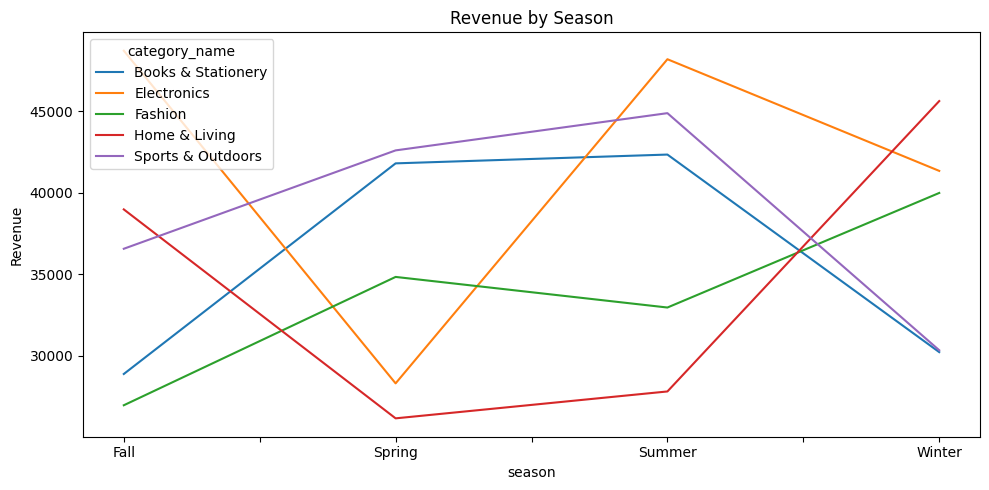

In [60]:
season_revenue.plot(kind='line', figsize=(10,5), title='Revenue by Season')
plt.ylabel('Revenue')
plt.xlabel('season')
plt.tight_layout()
plt.show()

This line chart shows seasonal revenue trends across product categories. Electronics dip in Spring but recover with a noticeable spike in Summer. Sports & Outdoors and Books & Stationery perform best in Spring and Summer, likely due to outdoor activities and school needs. Home & Living sees lower revenue in these seasons, while Fashion peaks in Winter, possibly due to seasonal wardrobe changes. These patterns suggest when to push specific product campaigns.

In [61]:
#GOING FURTHER INTO THE CATEGORY ANALYSIS - (We can see what category is popular in each month)
monthly_revenue = df.groupby(['year', 'month', 'category_name'])['revenue'].sum().reset_index()
highest_grossing = monthly_revenue.loc[monthly_revenue.groupby(['year', 'month'])['revenue'].idxmax()]
highest_grossing = highest_grossing.sort_values(by=['year', 'month'])
print(highest_grossing)

    year  month       category_name   revenue
3   2024      3       Home & Living  10019.72
5   2024      4  Books & Stationery  14643.56
14  2024      5   Sports & Outdoors  15586.79
16  2024      6         Electronics  17675.57
20  2024      7  Books & Stationery  15851.43
25  2024      8  Books & Stationery  17019.15
31  2024      9         Electronics  20306.41
36  2024     10         Electronics  18931.62
43  2024     11       Home & Living  15042.46
46  2024     12         Electronics  22678.27
53  2025      1       Home & Living  20497.49
56  2025      2         Electronics  12574.97
64  2025      3   Sports & Outdoors   8993.30


Electronics, Books & Stationery, Home & Living, and Sports & Outdoors appear most frequently across seasonal revenue trends. Electronics lead, as expected, driven by ongoing demand for tech products. The absence of Fashion, and Home & Living in most seasons aligns with its low total revenue, suggesting weak sales. This highlights a need to re-strategize and push Fashion offerings to boost performance.

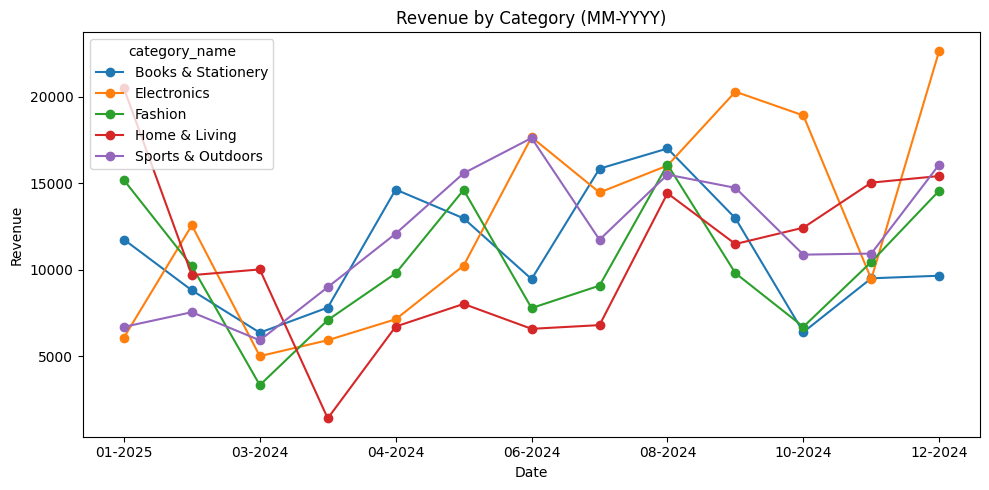

In [62]:
monthly_revenue['date'] = monthly_revenue['month'].astype(str).str.zfill(2) + '-' + monthly_revenue['year'].astype(str)
monthly_revenue_pivot = monthly_revenue.pivot_table(index='date', columns='category_name', values='revenue', aggfunc='sum')

monthly_revenue_pivot.plot(kind='line', figsize=(10,5), title='Revenue by Category (MM-YYYY)', marker='o')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

Home & Living shows consistently weak sales, second only to Fashion, with Spring being the lowest-performing season. This suggests a need to reassess the product offerings during that period to better align with customer needs and boost engagement in the low season.

In [63]:
#PAYMENT METHOD ANALYSIS - (We can see what payment method is popular in each age group and have possible enhancements to the payment method)
payment_method = df.groupby(['payment_method', 'age_group'], observed=False).size().reset_index(name='count')
h_payemnt_method = payment_method.loc[payment_method.groupby(['age_group'], observed=False)['count'].idxmax()]
payment_method = h_payemnt_method.sort_values(by=['age_group'])
print(payment_method)

      payment_method age_group  count
0      Bank Transfer  (18, 28]     62
7   Cash on Delivery  (28, 37]     64
8   Cash on Delivery  (37, 47]     72
9   Cash on Delivery  (47, 56]     55
4      Bank Transfer  (56, 66]     68
11  Cash on Delivery  (66, 75]     58


The majority of the customer base prefers Cash on Delivery, with Bank Transfer coming in second. While this indicates convenience and familiarity, it may also reflect a lack of trust in credit card services. This insight suggests a potential need to build confidence in online payments through better security messaging or incentives.

In [64]:
#Satisfaction of category per gender (Gives a glimpse of who we are catering for in that category)
satisfact_by_gender = df.groupby(['gender', 'category_name'])['review_score'].mean().reset_index()
print(satisfact_by_gender)

  gender       category_name  review_score
0      F  Books & Stationery      3.910714
1      F         Electronics      3.900000
2      F             Fashion      3.831325
3      F       Home & Living      3.800000
4      F   Sports & Outdoors      4.089552
5      M  Books & Stationery      3.946667
6      M         Electronics      4.131579
7      M             Fashion      4.142857
8      M       Home & Living      4.028169
9      M   Sports & Outdoors      4.012500


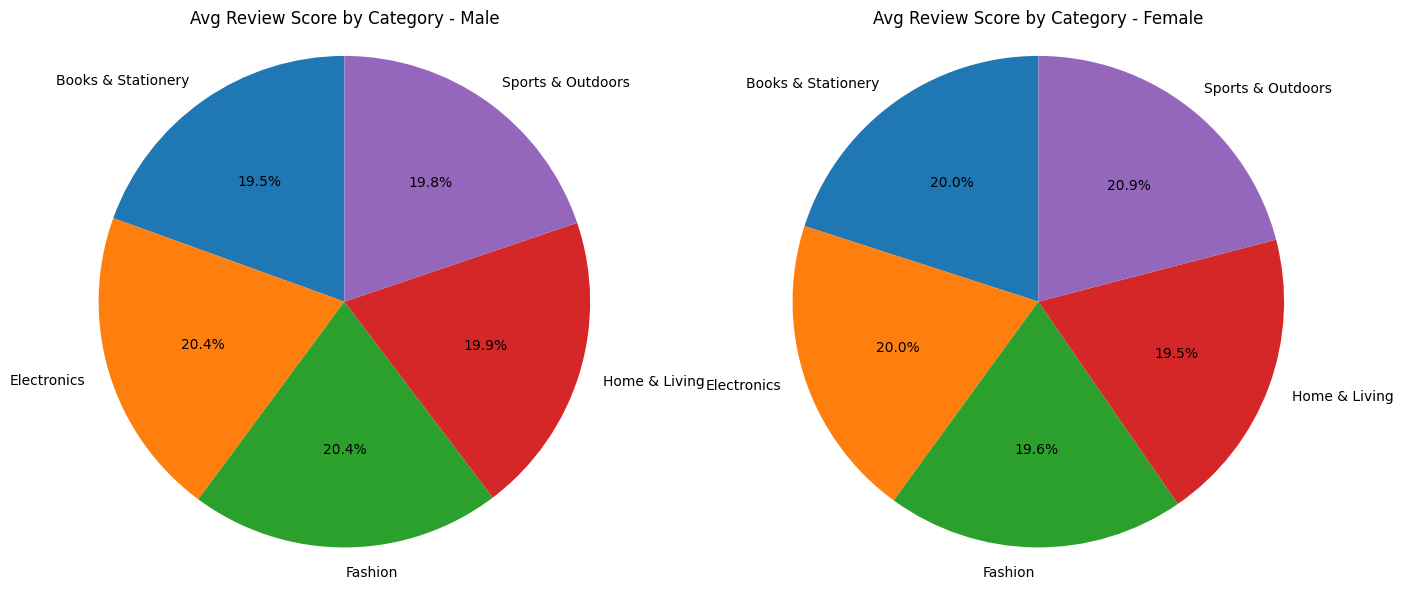

In [65]:
# Filter for Male and Female
male_data = satisfact_by_gender[satisfact_by_gender['gender'] == 'M']
female_data = satisfact_by_gender[satisfact_by_gender['gender'] == 'F']

# Plot the pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Male
axes[0].pie(male_data['review_score'], labels=male_data['category_name'], autopct='%1.1f%%', startangle=90)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axes[0].set_title('Avg Review Score by Category - Male')

# Pie chart for Female
axes[1].pie(female_data['review_score'], labels=female_data['category_name'], autopct='%1.1f%%', startangle=90)
axes[1].axis('equal')
axes[1].set_title('Avg Review Score by Category - Female')

plt.tight_layout()
plt.show()

The average review scores across product categories show minimal variation between male and female customers. Each category holds a fairly equal share of satisfaction, with percentages ranging between 19.5% and 20.5%. This consistency suggests a balanced experience across the board, indicating that product quality and service levels meet expectations regardless of gender. Maintaining this balance is positive, but to stand out, we could explore gender-specific feedback to identify areas for exceeding expectations rather than just meeting them.

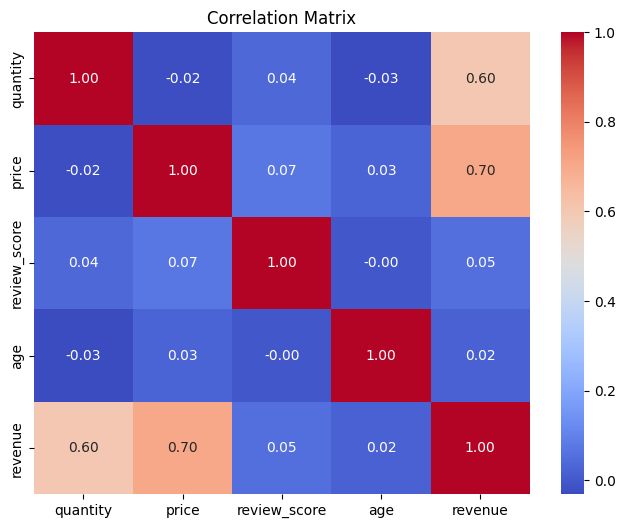

In [66]:
numeric_cols = ['quantity', 'price', 'review_score', 'age', 'revenue']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Key Insights:

- **Strong Correlations**:
  - **`price` and `revenue`**: **0.70** (strong positive correlation).
  - **`quantity` and `revenue`**: **0.60** (moderate positive correlation).

- **Weak or No Correlations**:
  - **`quantity` and `price`**: **-0.02** (very weak negative correlation).
  - **`review_score` and `age`**: **-0.00** (almost no correlation).
  - **`review_score` and `revenue`**: **0.05** (very weak positive correlation).
  - **`age` and `revenue`**: **0.02** (very weak positive correlation).

### Summary:
- **Revenue Drivers**:
  - Increasing `price` and `quantity` is likely to boost `revenue`.
  - `review_score` and `age` have minimal impact on `revenue`.

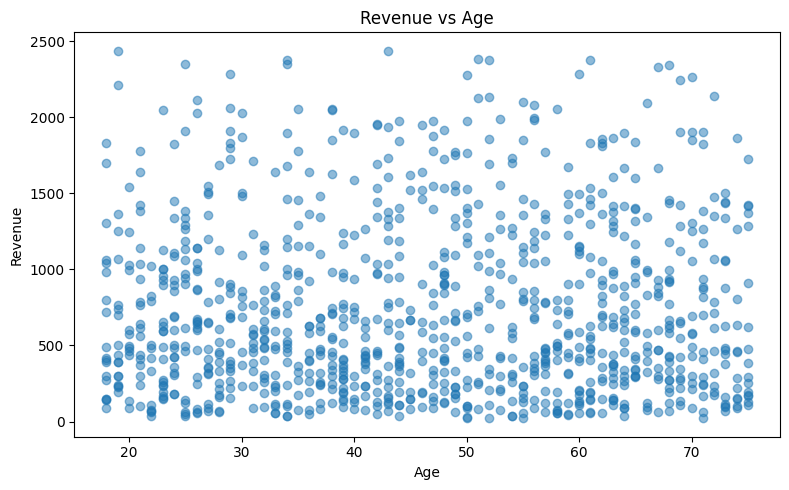

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['revenue'], alpha=0.5)
plt.title('Revenue vs Age')
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


## Key Takeaways from the Scatter Plot (Revenue vs. Age)

### Key Insights:

1. **No Strong Correlation**:
   - There is no significant linear relationship between age and revenue.
   - Age alone is not a reliable predictor of spending behavior.

2. **High Variability**:
   - Both younger and older individuals exhibit a wide range of revenue values.
   - High revenue values are present across various age groups, indicating that spending is not consistently higher for any specific age group.

3. **No Clear Trend**:
   - There is no consistent pattern showing that younger individuals spend more than older individuals or vice versa.
   - The data points are scattered without forming a discernible trend line.

### Summary:
- **Age is Not a Strong Predictor of Spending**: The scatter plot does not indicate that age is a primary factor in determining revenue.
- **Variable Spending Across Ages**: Revenue varies significantly within all age groups, suggesting that other factors (e.g., income, lifestyle, preferences) play a more significant role in spending behavior.

# Final Recommendations

## 1. Improve Trust in Credit Card Service
 Based on the finding that a significant portion of customers prefer using Cash on Delivery (COD) and Bank Transfer, the company may need to reevaluate the customer's trust in credit card services. This could indicate past negative experiences or concerns regarding security To address this, gathering customer feedback on their experiences  with credit card payments and ensuring a robust security system could help restore trust. Improvements in the payment security protocols could also boost the usage of credit card payments.

## 2. Boost Sales in Fashion and Home & Living Categories
 The Fashion and Home & Living categories are struggling, especially during their low season (Spring). To combat this, targeted product  campaigns should be implemented. The company could focus on:
- Analyzing current trends to ensure stock aligns with customer demand
- Offering seasonal promotions or discounts to encourage purchases
- Introducing seasonal products or exclusive collections to capture interest These strategies could help increase sales during the low season and  elevate their overall revenue.

## 3. Exceed Customer Expectations by Gender
While the analysis shows a balanced satisfaction score across genders, the company should look for opportunities to **exceed** customer expectations rather than just meeting them. The company could:
- Introduce gender-specific marketing campaigns to appeal to each gender's preferences
- Offer personalized shopping experiences, such as tailored recommendations
- Improve product diversity to ensure all customer segments feel catered to. By going beyond expectations, the company can increase customer loyalty  and satisfaction.

## 4. Attract and Retain Younger Generations.
The data shows that the majority of the customer base consists of older generations. While it's important to retain this demographic by offering a user-friendly interface, navigation, and simple design, the company should also focus on attracting younger customers (Millennials and Gen Z). Strategies to engage younger generations include:
- Optimizing the website for mobile devices and ensuring a seamless user experience on smartphones
- Leveraging social media and influencer marketing to create buzz around new products or trends
- Introducing loyalty programs, exclusive offers, or interactive campaigns

A balance must be struck between catering to older customers and attracting
younger ones to ensure sustained growth across all demographics.

In conclusion, focusing on these recommendations can help drive improvements in
customer trust, sales performance, gender satisfaction, and customer demographics,
positioning the company for continued success in a competitive market.
